In [71]:
import pandas as pd
from textblob import TextBlob

In [72]:
stocks=pd.read_csv('data/Ford Motor/stocksData/F.csv')

In [73]:
stocks['delta']=stocks['Close']-stocks['Open']
stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume,delta
0,2020-02-03,8.85,9.14,8.85,8.98,8.98,71432700,0.13
1,2020-02-04,9.08,9.24,9.07,9.18,9.18,86196400,0.10
2,2020-02-05,8.41,8.48,8.26,8.31,8.31,145792500,-0.10
3,2020-02-06,8.37,8.38,8.25,8.25,8.25,68823400,-0.12
4,2020-02-07,8.21,8.21,8.02,8.11,8.11,98256500,-0.10


In [77]:
stocks

,Date,Open,High,Low,Close,Adj Close,Volume,delta
0,2020-02-03,8.85,9.14,8.85,8.98,8.98,71432700,0.13
1,2020-02-04,9.08,9.24,9.07,9.18,9.18,86196400,0.10
2,2020-02-05,8.41,8.48,8.26,8.31,8.31,145792500,-0.10
3,2020-02-06,8.37,8.38,8.25,8.25,8.25,68823400,-0.12
4,2020-02-07,8.21,8.21,8.02,8.11,8.11,98256500,-0.10
5,2020-02-10,8.15,8.15,8.05,8.06,8.06,71834900,-0.09
6,2020-02-11,8.10,8.15,8.08,8.10,8.10,80164500,0.00
7,2020-02-12,8.14,8.33,8.13,8.24,8.24,111536800,0.10
8,2020-02-13,8.21,8.36,8.21,8.25,8.25,67648800,0.04
9,2020-02-14,8.27,8.27,8.08,8.10,8.10,46359700,-0.17


In [89]:
from afinn import Afinn
af = Afinn()

# compute sentiment scores (polarity) and labels
sent=[0,0]
for i in range(3,30):
    if(i<10):
        news=pd.read_excel('data/Ford Motor/Ford Motor_news_2020-02-0{}.xlsx'.format(i))
    else:
        news=pd.read_excel('data/Ford Motor/Ford Motor_news_2020-02-{}.xlsx'.format(i))
    sentiment=0.0
    for j in range(len(news)):
        H=str(news['Headline'][j])+" "+str(news['Description'][j])+" "+str(news['FullNews'][j])
        sentiment=sentiment+round(af.score(H), 3)
    sent.append(sentiment/len(news))
    #print("sentiment for day ",i,": ",sentiment/len(news))
    sentiment=0.0

In [93]:
sentiments=[]
for i in range(2,len(sent)):
    v=(sent[i-1]+sent[i-2]+sent[i])/3
    sentiments.append(round(v,3))
for i in range(len(sentiments)):
    print("sentiment for day ",i+3,": ",sentiments[i])

sentiment for day  3 :  1.55
sentiment for day  4 :  0.25
sentiment for day  5 :  0.8
sentiment for day  6 :  -0.067
sentiment for day  7 :  1.883
sentiment for day  8 :  2.15
sentiment for day  9 :  1.369
sentiment for day  10 :  0.902
sentiment for day  11 :  1.152
sentiment for day  12 :  2.283
sentiment for day  13 :  3.667
sentiment for day  14 :  3.3
sentiment for day  15 :  3.067
sentiment for day  16 :  2.857
sentiment for day  17 :  2.024
sentiment for day  18 :  2.024
sentiment for day  19 :  1.283
sentiment for day  20 :  2.417
sentiment for day  21 :  1.817
sentiment for day  22 :  0.45
sentiment for day  23 :  -2.933
sentiment for day  24 :  -1.867
sentiment for day  25 :  -1.267
sentiment for day  26 :  0.2
sentiment for day  27 :  -0.833
sentiment for day  28 :  -0.417
sentiment for day  29 :  -0.317


In [111]:
senty=[1.55,0.8,0.22,-0.067,-0.883,0.902,1.152,2.283,3.667,3.3,2.024,1.283,2.417,1.817,-1.867,-1.267,0.2,-0.833]
len(senty)

18

In [118]:
res=[1,1,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0]
len(res)

18

In [121]:
accu=0.0
TP=TN=FP=FN=0
for i in range(len(stocks)-2):
    if(stocks['delta'][i]<0):
        if(res[i]==0):
            accu=accu+1
            TN=TN+1
        else:
            FP=FP+1
    else:
        if(res[i]==1):
            accu=accu+1
            TP=TP+1
        else:
            FN=FN+1
print(accu/len(res))
print('false positives:',FP)
print('true positives:',TP)
print('false negatives:',FN)
print('true negative:',TN)
'''import math
sent=[]
for i in range(2,12):
    if(i<10):
        news=pd.read_excel('data/Ford Motor/Ford Motor_news_2020-02-0{}.xlsx'.format(i))
    else:
        news=pd.read_excel('data/Ford Motor/Ford Motor_news_2020-02-{}.xlsx'.format(i))
    sentiment=0.0
    for j in range(len(news)):
        H=str(news['Headline'][j])+" "+str(news['Description'][j])+" "+str(news['FullNews'][j])
        x=round(TextBlob(H).sentiment.polarity, 3)
        if(x>0):
            sentiment=sentiment+math.exp(x)
        else:
            sentiment=sentiment-math.exp(x)
        #sentiment=sentiment+round(TextBlob(H).sentiment.polarity, 3)
    sent.append(sentiment/len(news))
    sentiment=0.0
sent'''

0.7222222222222222
false positives: 5
true positives: 6
false negatives: 0
true negative: 7


'import math\nsent=[]\nfor i in range(2,12):\n    if(i<10):\n        news=pd.read_excel(\'data/Ford Motor/Ford Motor_news_2020-02-0{}.xlsx\'.format(i))\n    else:\n        news=pd.read_excel(\'data/Ford Motor/Ford Motor_news_2020-02-{}.xlsx\'.format(i))\n    sentiment=0.0\n    for j in range(len(news)):\n        H=str(news[\'Headline\'][j])+" "+str(news[\'Description\'][j])+" "+str(news[\'FullNews\'][j])\n        x=round(TextBlob(H).sentiment.polarity, 3)\n        if(x>0):\n            sentiment=sentiment+math.exp(x)\n        else:\n            sentiment=sentiment-math.exp(x)\n        #sentiment=sentiment+round(TextBlob(H).sentiment.polarity, 3)\n    sent.append(sentiment/len(news))\n    sentiment=0.0\nsent'

In [130]:
PRECISION=TP/(TP+FP)
RECALL=TP/(TP+1)
ACCURACY=(TP+TN)/(TP+TN+FP)
print("accuracy:",ACCURACY)
print("precision",PRECISION)
print("recall",RECALL)

accuracy: 0.7222222222222222
precision 0.5454545454545454
recall 0.8571428571428571


In [128]:
TN/(TN+FP)

0.5833333333333334

In [51]:
import matplotlib.pyplot as plt

In [67]:
delta=s['delta']
sen=[0.9017031738245868,0.5844799875288462,0.29796806134937504,0.26589587242580726,1.0320525168511205,0.3126596518617588,0.5102638407098397]
len(sen)==len(delta)

True

In [62]:
delta

0    0.13
1    0.10
2   -0.10
3   -0.12
4   -0.10
5   -0.09
6    0.00
Name: delta, dtype: float64

In [103]:
stocks[:len(stocks)]

,Date,Open,High,Low,Close,Adj Close,Volume,delta
0,2020-02-03,8.85,9.14,8.85,8.98,8.98,71432700,0.13
1,2020-02-04,9.08,9.24,9.07,9.18,9.18,86196400,0.10
2,2020-02-05,8.41,8.48,8.26,8.31,8.31,145792500,-0.10
3,2020-02-06,8.37,8.38,8.25,8.25,8.25,68823400,-0.12
4,2020-02-07,8.21,8.21,8.02,8.11,8.11,98256500,-0.10
5,2020-02-10,8.15,8.15,8.05,8.06,8.06,71834900,-0.09
6,2020-02-11,8.10,8.15,8.08,8.10,8.10,80164500,0.00
7,2020-02-12,8.14,8.33,8.13,8.24,8.24,111536800,0.10
8,2020-02-13,8.21,8.36,8.21,8.25,8.25,67648800,0.04
9,2020-02-14,8.27,8.27,8.08,8.10,8.10,46359700,-0.17


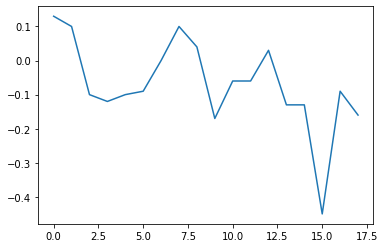

In [115]:
plt.plot(stocks['delta'][:len(stocks)-2])
plt.savefig('priceDeltaFord.png')

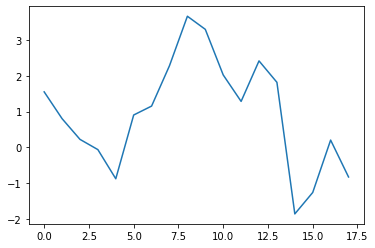

In [116]:
plt.plot(senty)
plt.savefig('sentimentTrends.png')

In [31]:
sentiment=0.0
for i in range(len(news4)):
    H=str(news4['Headline'][i])+" "+str(news4['Description'][i])+" "+str(news4['FullNews'][i])
    #print(H)
    #print(round(TextBlob(H).sentiment.polarity, 3))
    sentiment=sentiment+round(TextBlob(H).sentiment.polarity, 3)
print(sentiment/len(news4))

0.04870000000000001


In [6]:
af.score("Factbox: Carmakers close Chinese factories because of coronavirus")

0.0